<a href="https://colab.research.google.com/github/bonareri/Bitcoin-Prediction-Analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
!pip install python-dotenv

In [73]:
!pip install tweepy

In [121]:
!pip install nltk textblob

In [104]:
!pip install spacy textblob
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 79.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [105]:
# import libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import spacy
from textblob import TextBlob
from collections import Counter

import matplotlib.pyplot as plt
from google.colab import files
plt.style.use('fivethirtyeight')

import nltk

# Reinstall punkt package
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [75]:
uploaded = files.upload()

Saving twitter_keys.env to twitter_keys (2).env


In [76]:
import os

print(os.listdir())  # Should display 'twitter_keys.env'

['.config', 'coindesk_news.csv', 'articles.csv', 'twitter_keys.env', 'tweets.csv', 'yahoo_bitcoin_news.csv', 'twitter_keys (2).env', 'twitter_keys (1).env', 'sample_data']


In [77]:
from dotenv import load_dotenv

# Load API keys from .env file
load_dotenv("twitter_keys.env")

# Access keys
BEARER_TOKEN = os.getenv("BEARER_TOKEN")

In [78]:
# Authenticate using Bearer Token (API v2)
client = tweepy.Client(bearer_token=BEARER_TOKEN)

In [86]:
query = "Bitcoin -is:retweet lang:en"  # Remove retweets, only English tweets
tweets = client.search_recent_tweets(query=query, max_results=100, tweet_fields=["created_at"])

# Store tweets in a list
tweet_data = [{"text": tweet.text, "created_at": tweet.created_at} for tweet in tweets.data]

# Print stored tweets
print(tweet_data)

TooManyRequests: 429 Too Many Requests
Too Many Requests

In [87]:
import csv

# Save tweets to a CSV file
with open("tweets.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Created_At", "Tweet_Text"])  # Header row
    for tweet in tweet_data:
        writer.writerow([tweet["created_at"], tweet["text"]])

print("Tweets saved successfully to tweets.csv")

Tweets saved successfully to tweets.csv


In [129]:
#load data
df = pd.read_csv("/content/tweets.csv")
df.head()

,Created_At,Tweet_Text
0,2025-02-10 13:51:04+00:00,Sam Bankman-Fried's Parents Request a Pardon f...
1,2025-02-10 13:51:04+00:00,5.The analyst known as PlanB anticipates Bitco...
2,2025-02-10 13:51:04+00:00,@CatchUpFeed @stillgray Today I'm proud becaus...
3,2025-02-10 13:51:02+00:00,@MaxBrownBTC Everybody loves Bitcoin!
4,2025-02-10 13:51:02+00:00,@MaxBrownBTC [Breaking News] An old YouTube vi...


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Created_At  10 non-null     object
 1   Tweet_Text  10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes


## Data Preprocessing

### 🧹 Tweet Cleaning & Preprocessing

#### ✅ Steps Taken:
1. **Removed Mentions** (`@username`)  
2. **Removed URLs** (e.g., `http://example.com`)  
3. **Removed Special Characters** (kept only letters and spaces)  
4. **Converted to Lowercase** (standardized text format)  
5. **Removed Stopwords** (common words like *the, is, and, for, in, by*)  
6. **Lemmatized Words** (converted words to their base form, e.g., *running → run*)

In [131]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def clean_tweet(text):
    # Remove mentions, URLs, special characters
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters

    # Convert to lowercase
    text = text.lower().strip()

    # Process text using spaCy
    doc = nlp(text)

    # Apply Lemmatization & Remove spaCy's Default Stopwords
    cleaned_text = " ".join([token.lemma_ for token in doc if token.lemma_ not in nlp.Defaults.stop_words and not token.is_punct])

    return cleaned_text

# Apply cleaning function
df["cleaned_text"] = df["Tweet_Text"].astype(str).apply(clean_tweet)

df.head()

,Created_At,Tweet_Text,cleaned_text
0,2025-02-10 13:51:04+00:00,Sam Bankman-Fried's Parents Request a Pardon f...,sam bankmanfrieds parent request pardon presid...
1,2025-02-10 13:51:04+00:00,5.The analyst known as PlanB anticipates Bitco...,analyst know planb anticipate bitcoin price re...
2,2025-02-10 13:51:04+00:00,@CatchUpFeed @stillgray Today I'm proud becaus...,today I m proud I gain I lose trading far rais...
3,2025-02-10 13:51:02+00:00,@MaxBrownBTC Everybody loves Bitcoin!,everybody love bitcoin
4,2025-02-10 13:51:02+00:00,@MaxBrownBTC [Breaking News] An old YouTube vi...,break news old youtube video resurface long ...


## Sentiment Analysis

In [132]:
# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [133]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Function to get VADER sentiment scores
def get_vader_scores(text):
    scores = sia.polarity_scores(text)  # Get sentiment scores
    return pd.Series([scores["compound"], scores["neg"], scores["neu"], scores["pos"]])

# Apply function and store results in DataFrame
df[["compound", "neg", "neu", "pos"]] = df["cleaned_text"].apply(get_vader_scores)

# Assign sentiment category based on compound score
df["VADER_Sentiment"] = df["compound"].apply(lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral"))

df.head()

,Created_At,Tweet_Text,cleaned_text,compound,neg,neu,pos,VADER_Sentiment
0,2025-02-10 13:51:04+00:00,Sam Bankman-Fried's Parents Request a Pardon f...,sam bankmanfrieds parent request pardon presid...,0.6597,0.000,0.625,0.375,Positive
1,2025-02-10 13:51:04+00:00,5.The analyst known as PlanB anticipates Bitco...,analyst know planb anticipate bitcoin price re...,0.3774,0.073,0.730,0.197,Positive
2,2025-02-10 13:51:04+00:00,@CatchUpFeed @stillgray Today I'm proud becaus...,today I m proud I gain I lose trading far rais...,0.7717,0.087,0.611,0.302,Positive
3,2025-02-10 13:51:02+00:00,@MaxBrownBTC Everybody loves Bitcoin!,everybody love bitcoin,0.6369,0.000,0.323,0.677,Positive
4,2025-02-10 13:51:02+00:00,@MaxBrownBTC [Breaking News] An old YouTube vi...,break news old youtube video resurface long ...,0.0000,0.000,1.000,0.000,Neutral


### Visualizing Sentiment Distribution

<ipython-input-137-4057efe40063>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["VADER_Sentiment"], palette="viridis")


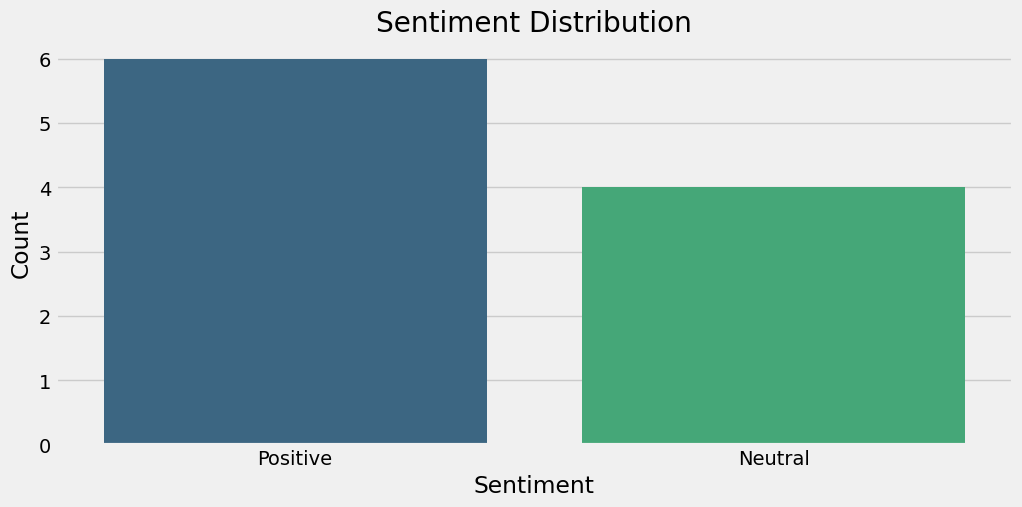

In [137]:
# Countplot for sentiment distribution
plt.figure(figsize=(11, 5))
sns.countplot(x=df["VADER_Sentiment"], palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

### Generate Word Clouds

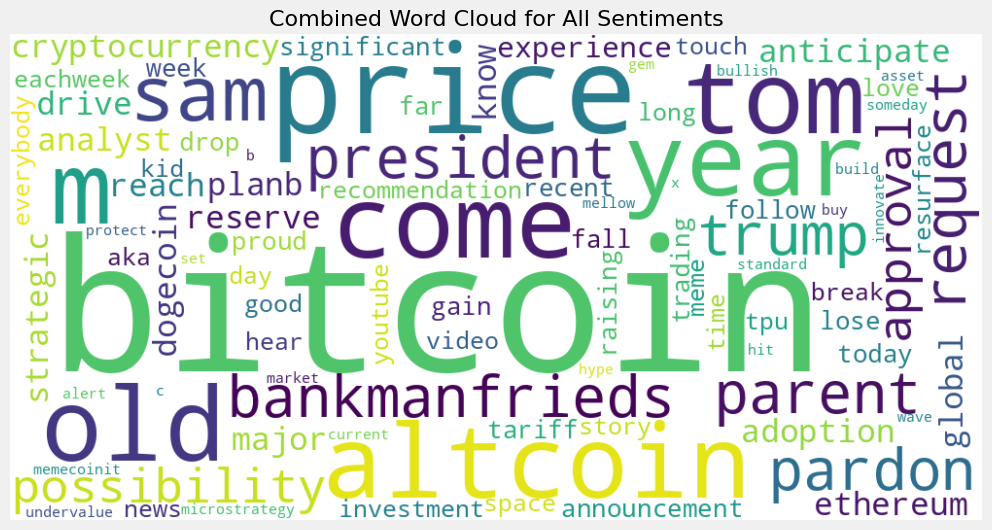

In [138]:
# Combine all text from all sentiments
all_text = " ".join(df["cleaned_text"])

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color="white", colormap="viridis").generate(all_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Combined Word Cloud for All Sentiments", fontsize=16)
plt.show()

### Compare VADER sentiment scores with the actual text content.

In [139]:
# Select relevant columns for comparison
df_comparison = df[["Tweet_Text", "cleaned_text", "VADER_Sentiment", "compound", "neg", "neu", "pos"]]

# Display a sample of the data
df_comparison.head()  # Adjust the number as needed

,Tweet_Text,cleaned_text,VADER_Sentiment,compound,neg,neu,pos
0,Sam Bankman-Fried's Parents Request a Pardon f...,sam bankmanfrieds parent request pardon presid...,Positive,0.6597,0.000,0.625,0.375
1,5.The analyst known as PlanB anticipates Bitco...,analyst know planb anticipate bitcoin price re...,Positive,0.3774,0.073,0.730,0.197
2,@CatchUpFeed @stillgray Today I'm proud becaus...,today I m proud I gain I lose trading far rais...,Positive,0.7717,0.087,0.611,0.302
3,@MaxBrownBTC Everybody loves Bitcoin!,everybody love bitcoin,Positive,0.6369,0.000,0.323,0.677
4,@MaxBrownBTC [Breaking News] An old YouTube vi...,break news old youtube video resurface long ...,Neutral,0.0000,0.000,1.000,0.000


### Tokenize & Count Word Frequencies

<ipython-input-141-ec4be849279c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Word", data=word_freq_df, palette="magma")


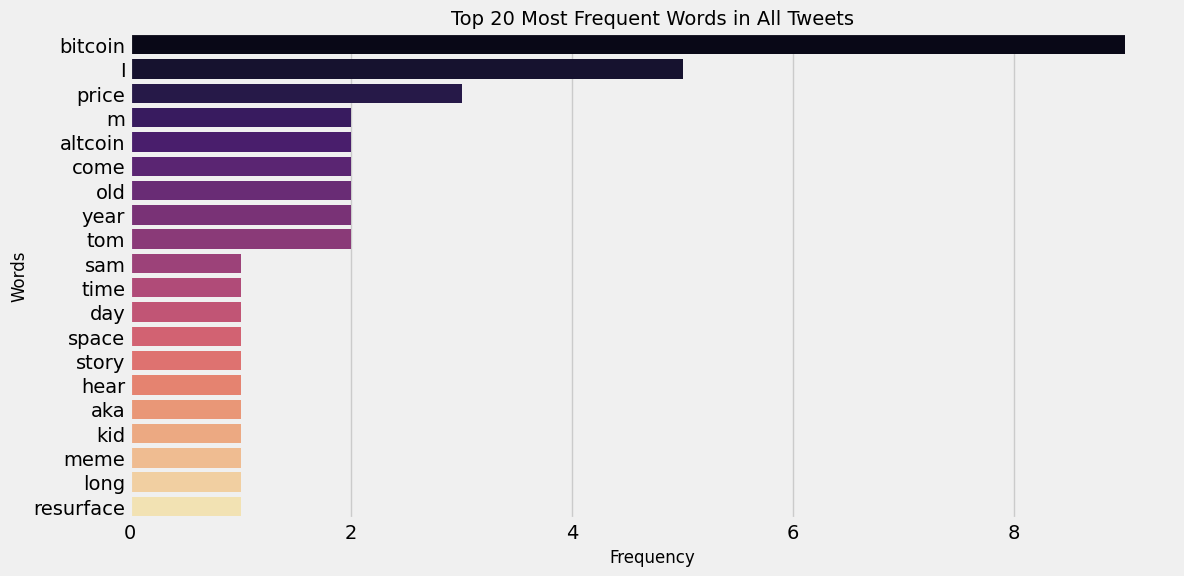

In [141]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all cleaned tweets into a single text
all_tweets_text = " ".join(df["cleaned_text"])

# Tokenize and count word frequencies
all_words = all_tweets_text.split()
word_freq = Counter(all_words)

# Convert to DataFrame for visualization
word_freq_df = pd.DataFrame(word_freq.items(), columns=["Word", "Frequency"])
word_freq_df = word_freq_df.sort_values(by="Frequency", ascending=False).head(20)  # Top 20 words

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Frequency", y="Word", data=word_freq_df, palette="magma")
plt.title("Top 20 Most Frequent Words in All Tweets", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Words", fontsize=12)
plt.show()

### Feature Extraction:
**Text Vectorization**

Text data needs to be transformed into numerical format since machine learning models cannot directly work with text.

I will choose TF-IDF (Term Frequency-Inverse Document Frequency) because it reflects how important a word is within a document and across the entire dataset. This is particularly useful for capturing the essence of a text review without giving too much importance to common words (like "the", "is", etc.).

TF-IDF Explanation:

TF (Term Frequency): Measures how frequently a word appears in a document.
IDF (Inverse Document Frequency): Measures how common or rare a word is across all documents. Rare words are given higher weightage.

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limit to top 1000 words
X_tfidf = tfidf_vectorizer.fit_transform(df["cleaned_text"])

# Convert to DataFrame for better readability
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.head()

,adoption,aka,alert,altcoin,analyst,announcement,anticipate,approval,asset,bankmanfrieds,...,touch,tpu,trading,trump,undervalue,video,wave,week,year,youtube
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.313666,0.0,0.313666,...,0.00000,0.000000,0.00000,0.313666,0.0,0.000000,0.0,0.00000,0.000000,0.000000
1,0.200897,0.000000,0.0,0.170781,0.200897,0.200897,0.200897,0.000000,0.0,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.25918,0.000000,0.25918,0.000000,0.0,0.000000,0.0,0.25918,0.000000,0.000000
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
4,0.000000,0.189366,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00000,0.189366,0.00000,0.000000,0.0,0.189366,0.0,0.00000,0.378732,0.189366


## Model Training

### Splitting Data for Training & Testing

In [143]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = X_tfidf  # Using TF-IDF features
y = df["VADER_Sentiment"]  # Target labels

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 8, Testing samples: 2


### Logistic Regression

In [144]:
from sklearn.linear_model import LogisticRegression

# Initialize model
model = LogisticRegression(max_iter=500)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

### Evaluate Model Performance

In [145]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
y_pred = model.predict(X_test)

# Print evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.50
              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00         1
    Positive       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

